In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from statannotations.Annotator import Annotator
from scipy.stats import wilcoxon

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import os
os.chdir("../Sup_Fig_S2")

In [4]:
RANKS = ['class', 'order', 'family', 'genus', 'species']
PHYLA = ['Annelida', 'Arthropoda', 'Chordata', 'Cnidaria', 'Echinodermata', 'Mollusca', 'Nematoda', 'Platyhelminthes']

In [5]:
df = pd.read_csv("Sup_Fig_S2.data.csv", sep=',')
df['rank'] = pd.Categorical(df['rank'], ordered=True, categories=RANKS)
df['phylum'] = pd.Categorical(df['phylum'], ordered=True, categories=PHYLA)
df['base'] = pd.Categorical(df['base'], ordered=True, categories=['t6-320', 't12-480'])
df = df.sort_values(['rank', 'phylum'])
df.head(n=2)

,base,phylum,rank,AUROC,AUPR
0,t6-320,Annelida,class,0.996351,0.964091
1,t12-480,Annelida,class,0.993477,0.973444


In [6]:
pairs = [((rank, 't6-320'), (rank, 't12-480')) for rank in RANKS]

In [7]:
roc_std, pr_std = [], []
for base in ["t6-320", 't12-480']:
    roc_std.append(df.query("base == @base").groupby('rank')['AUROC'].std().values)
    pr_std.append(df.query("base == @base").groupby('rank')['AUPR'].std().values)
roc_std = np.concatenate(roc_std)
pr_std = np.concatenate(pr_std)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

order_t6-320 vs. order_t12-480: Wilcoxon test (paired samples), P_val:1.953e-01 Stat=8.000e+00
class_t6-320 vs. class_t12-480: Wilcoxon test (paired samples), P_val:8.438e-01 Stat=1.600e+01
family_t6-320 vs. family_t12-480: Wilcoxon test (paired samples), P_val:3.125e-01 Stat=1.000e+01
genus_t6-320 vs. genus_t12-480: Wilcoxon test (paired samples), P_val:3.906e-02 Stat=3.000e+00
species_t6-320 vs. species_t12-480: Wilcoxon test (paired samples), P_val:3.828e-01 Stat=1.100e+01
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

order_t6-320 vs. order_t12-480: Wilcoxon test (paired samples), P_val:4.609e-01 Stat=1.200e+01
class_t6-320 vs. class_t12-480: Wilcoxon

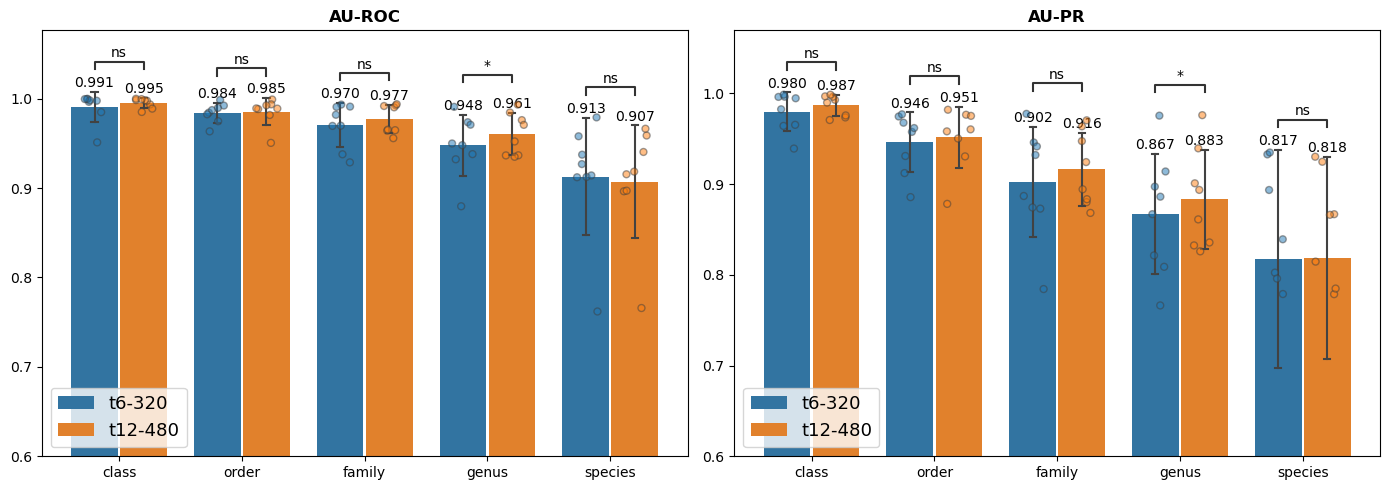

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0] = sns.barplot(data=df,
    x='rank', y='AUROC',
    hue='base',
    errorbar='sd', capsize=0.1,
    err_kws={'linewidth': 1.5},
    gap=.05,
    ax=ax[0]
)
ax[0].set_ylim((0.6, 1.02))

# Get bar heights and centers
bar_heights = [p.get_height() for p in ax[0].patches]
bar_centers = [p.get_x() + p.get_width() / 2.0 for p in ax[0].patches]

# Add annotations with offset
for i, (height, margin) in enumerate(zip(bar_heights, roc_std)):
    ax[0].text(bar_centers[i], height + margin + 0.002, f'{height:.3f}',  # Adjust offset (0.25) as needed
            ha='center', va='bottom', size=10)
sns.move_legend(ax[0], loc='lower left', fontsize=13)
ax[0].get_legend().set_title(None)

ax[0] = sns.stripplot(data=df,
    x='rank', y='AUROC', 
    hue='base', alpha=0.5,
    jitter=0.2, linewidth=1,
    dodge=True, size=5,
    ax=ax[0], 
    legend=False
)
ax[0].set_xlabel(None)
ax[0].set_ylabel(None)
ax[0].set_title("AU-ROC", fontweight='bold')

# add stat annots
annotator = Annotator(ax[0], pairs, data=df, x='rank', y='AUROC', hue='base')
annotator.configure(test='Wilcoxon', text_format='star')
annotator.apply_and_annotate()


ax[1] = sns.barplot(data=df,
    x='rank', y='AUPR',
    hue='base',
    errorbar='sd', capsize=0.1,
    err_kws={'linewidth': 1.5},
    gap=.05,
    ax=ax[1]
)
ax[1].set_ylim((0.6, 1.02))

# Get bar heights and centers
bar_heights = [p.get_height() for p in ax[1].patches]
bar_centers = [p.get_x() + p.get_width() / 2.0 for p in ax[1].patches]

# Add annotations with offset
for i, (height, margin) in enumerate(zip(bar_heights, pr_std)):
    ax[1].text(bar_centers[i], height + margin + 0.002, f'{height:.3f}',  # Adjust offset (0.25) as needed
            ha='center', va='bottom', size=10)
sns.move_legend(ax[1], loc='lower left', fontsize=13)
ax[1].get_legend().set_title(None)

ax[1] = sns.stripplot(data=df,
    x='rank', y='AUPR', 
    hue='base', alpha=0.5,
    jitter=0.2, linewidth=1,
    dodge=True, size=5,
    ax=ax[1], 
    legend=False
)
ax[1].set_xlabel(None)
ax[1].set_ylabel(None)
ax[1].set_title("AU-PR", fontweight='bold')

# add stat annots
annotator = Annotator(ax[1], pairs, data=df, x='rank', y='AUPR', hue='base')
annotator.configure(test='Wilcoxon', text_format='star')
annotator.apply_and_annotate()

fig.tight_layout()

In [9]:
fig.figure.savefig("../../Figures/Sup_Fig_S2.pdf", format='pdf', bbox_inches='tight')